# Statistical and numerical methods in cosmology
# HW #3
### *Hernán E. Noriega B.*
### Instituto de Física, Universidad Nacional Autónoma de México

In [1]:
import numpy as np
import scipy
import math
import statistics
from sympy import integrate
from scipy.integrate import quad
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp1d

### Generate the data and random files

In [2]:
#we create the random (R) and data (D)

n = 1000 #total points
l = 100 #Box's length
r = 30 #radius
c = 20 #circumferences 

#Random
R = np.zeros((2,n))
R[0] = l*np.random.rand(n)
R[1] = l*np.random.rand(n)

#Data
X = []
Y = []

#(x-h)²+(y-k)²=r² , h,k= center , r=radius
for jj in range(c):
    h = l*np.random.rand() 
    k = l*np.random.rand() 
    for ii in range(int(n/c)):
        theta = 2*np.pi*np.random.rand() #angle
        x = h + r*np.cos(theta) #x coordinate
        y = k + r*np.sin(theta) #y coordinate
        #return the outside points to the box
        if (x < 0):
            x = x + l
        if (x > l):
            x = x - l
        if (y < 0):
            y = y + l
        if (y > l):
            y = y - l
        X.append(x)
        Y.append(y)
#Data - convert from list to array -     
D = np.array([X, Y])

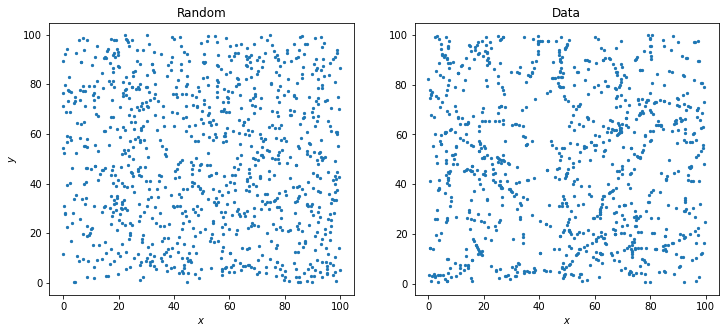

In [3]:
fig, axs = plt.subplots(1,2,figsize=(12,5))

axs[0].scatter(R[0], R[1], s=5)
axs[0].set_title('Random')
axs[0].set_xlabel(r'$x$')

axs[1].scatter(D[0], D[1], s=5)
axs[1].set_title('Data')
axs[1].set_xlabel(r'$x$')

axs[0].set_ylabel(r'$y$')
plt.show()

### Update your brute-force 2PCF
"for" runs to 100, MY PC BREAKS DOWN in range(0,1000)

#### DDD, DDR, DRR and RRR in function of $(r_1,r_2,r_3)$

In [4]:
def DF(x1,x2,y1,y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2) #DF: Distance Function, not the city xD

#"reshape"
D = np.swapaxes(D,0,1) #from (2,1000) to (1000,2)
R = np.swapaxes(R,0,1) #from (2,1000) to (1000,2)

In [5]:
bins = 15 #suggested in HW#3
points = 100 #my pc freezes in range(0,1000)
max_length = np.sqrt(2)*l #max_length: maximum length

# bins = max length/binsize
binsize = max_length/bins

DDD = np.zeros((bins,bins,bins))
for i in range(0,points): 
    for j in range(i+1,points):
        for k in range(j+1, points):
            distij = DF(D[i][0],D[j][0],D[i][1],D[j][1]) #d_ij: distance i-j
            distik = DF(D[i][0],D[k][0],D[i][1],D[k][1]) #d_ik
            distjk = DF(D[j][0],D[k][0],D[j][1],D[k][1]) #d_jk
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(distjk/binsize)
            DDD[m][p][q] = DDD[m][p][q]+1
DDD = np.array((1/np.sum(DDD)))*DDD #normalization
print("sum(DDD) =",np.sum(DDD),'(normalized)')

sum(DDD) = 1.0 (normalized)


In [6]:
DDR = np.zeros((bins,bins,bins))
for i in range(0,points): #Data i
    for j in range(i+1,points): #Data i+1
        for k in range(0, points): #Rand
            distij = DF(D[i][0],D[j][0],D[i][1],D[j][1]) #distij(distance Data-Data)
            distik = DF(D[i][0],R[k][0],D[i][1],R[k][1]) #d_ik (distance Data-Rand)
            distjk = DF(D[j][0],R[k][0],D[j][1],R[k][1]) #d_jk (Distance Data-Rand)
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(distjk/binsize)
            DDR[m][p][q] = DDR[m][p][q]+1
DDR = np.array((1/np.sum(DDR)))*DDR #normalization
print("sum(DDR) =",np.sum(DDR),'(normalized)')

sum(DDR) = 1.0 (normalized)


In [7]:
DRR = np.zeros((bins,bins,bins))
for i in range(0,points): #Data
    for j in range(0,points): #Rand j
        for k in range(j+1, points): #Rand j+1
            distij = DF(D[i][0],R[j][0],D[i][1],R[j][1]) #distij
            distik = DF(D[i][0],R[k][0],D[i][1],R[k][1]) #d_ik 
            distjk = DF(R[j][0],R[k][0],R[j][1],R[k][1]) #d_jk 
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(distjk/binsize)
            DRR[m][p][q] = DRR[m][p][q]+1
DRR = np.array((1/np.sum(DRR)))*DRR #normalization
print("sum(DRR) =",np.sum(DRR),'(normalized)')

sum(DRR) = 1.0 (normalized)


In [8]:
RRR = np.zeros((bins,bins,bins))
for i in range(0,points): 
    for j in range(i+1,points):
        for k in range(j+1, points):
            distij = DF(R[i][0],R[j][0],R[i][1],R[j][1]) #d_ij: distance i-j
            distik = DF(R[i][0],R[k][0],R[i][1],R[k][1]) #d_ik
            distjk = DF(R[j][0],R[k][0],R[j][1],R[k][1]) #d_jk
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(distjk/binsize)
            RRR[m][p][q] = RRR[m][p][q]+1
RRR = np.array((1/np.sum(RRR)))*RRR #normalization
print("sum(RRR) =",np.sum(RRR),'(normalized)')

sum(RRR) = 1.0 (normalized)


####  DDD, DDR, DRR and RRR in function of $(r_1,r_2,\theta_{12})$
Bernardeau et al., 2002

In [9]:
DDD_A = np.zeros((bins,bins,bins)) #DDD_A is DDD histogram with Angle (A)
b_angle = np.pi/bins #b_angle = (max_angle in a triangle)/bins

theta = []
for i in range(0,points): 
    for j in range(i+1,points):
        for k in range(j+1, points):
            distij = DF(D[i][0],D[j][0],D[i][1],D[j][1]) #d_ij: #r1
            distik = DF(D[i][0],D[k][0],D[i][1],D[k][1]) #d_ik: #r2
            univeij = (D[j]-D[i])/distij    #unit vector (r1)
            univeik = (D[k]-D[i])/distik    #unit vector (r2)
            theta12 = np.arccos(np.dot(univeij,univeik)) #(radians) [0,pi]
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(theta12/b_angle)
            theta.append(theta12)
            DDD_A[m][p][q] = DDD_A[m][p][q]+1
DDD_A = np.array((1/np.sum(DDD_A)))*DDD_A #normalization
print("sum(DDD_A) =",np.sum(DDD_A),'(normalized)')
theta_DDD = np.array([theta])*180/np.pi #theta12(degrees) <<-- if you wanna visualized

sum(DDD_A) = 1.0 (normalized)


In [10]:
DDR_A = np.zeros((bins,bins,bins)) #DDR_A is DDR histogram with Angle (A)
theta = []
for i in range(0,points): #Data i
    for j in range(i+1,points): #Data i+1
        for k in range(0, points): #Rand
            distij = DF(D[i][0],D[j][0],D[i][1],D[j][1]) #d_ij: #r1
            distik = DF(D[i][0],R[k][0],D[i][1],R[k][1]) #d_ik  #r2
            univeij = (D[j]-D[i])/distij    #unit vector (r1)
            univeik = (R[k]-D[i])/distik    #unit vector (r2)
            theta12 = np.arccos(np.dot(univeij,univeik)) #(radians) [0,pi]
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(theta12/b_angle)
            theta.append(theta12)
            DDR_A[m][p][q] = DDR_A[m][p][q]+1
DDR_A = np.array((1/np.sum(DDR_A)))*DDR_A #normalization
print("sum(DDR_A) =",np.sum(DDR_A),'(normalized)')
theta_DDR = np.array([theta])*180/np.pi #angle theta12 (degrees)

sum(DDR_A) = 1.0 (normalized)


In [11]:
DRR_A = np.zeros((bins,bins,bins))  #DRR_A is DRR histogram with Angle (A)
theta = []
for i in range(0,points): #Data
    for j in range(0,points): #Rand
        for k in range(j+1, points): #Rand j+1
            distij = DF(D[i][0],R[j][0],D[i][1],R[j][1]) #d_ij: r1
            distik = DF(D[i][0],R[k][0],D[i][1],R[k][1]) #d_ik: r2
            univeij = (R[j]-D[i])/distij    #unit vector (r1)
            univeik = (R[k]-D[i])/distik    #unit vector (r2)
            theta12 = np.arccos(np.dot(univeij,univeik)) #(radians) [0,pi]
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(theta12/b_angle)
            theta.append(theta12)
            DRR_A[m][p][q] = DRR_A[m][p][q]+1
DRR_A = np.array((1/np.sum(DRR_A)))*DRR_A #normalization
print("sum(DRR_A) =",np.sum(DRR_A),'(normalized)')
theta_DRR = np.array([theta])*180/np.pi  #angle theta12 (degrees)

sum(DRR_A) = 1.0 (normalized)


In [12]:
RRR_A = np.zeros((bins,bins,bins))
theta = []
for i in range(0,points): 
    for j in range(i+1,points):
        for k in range(j+1, points):
            distij = DF(R[i][0],R[j][0],R[i][1],R[j][1]) #d_ij: #r1
            distik = DF(R[i][0],R[k][0],R[i][1],R[k][1]) #d_ik  #r2
            univeij = (R[j]-R[i])/distij    #unit vector (r1)
            univeik = (R[k]-R[i])/distik    #unit vector (r2)
            theta12 = np.arccos(np.dot(univeij,univeik))  #(radians) [0,pi]
            m = int(distij/binsize)
            p = int(distik/binsize)
            q = int(theta12/b_angle)
            theta.append(theta12)
            RRR_A[m][p][q] = RRR_A[m][p][q]+1
RRR_A = np.array((1/np.sum(RRR_A)))*RRR_A #normalization
print("sum(RRR_A) =",np.sum(RRR_A),'(normalized)')
theta_RRR = np.array([theta])*180/np.pi #angle theta12 (degrees)

sum(RRR_A) = 1.0 (normalized)


### István Szapudi & Alexander S. Szalay estimator

$${ \xi  }_{ ss }^{ 3 }=\frac { DDD-3DDR+3DRR-RRR }{ RRR } $$

#### ${ \xi  }_{ ss }^{ 3 } (r,r,r)\quad \&  \quad { \xi  }_{ ss }^{ 3 } (l/3,l/6,r)$

remember $l=100$ is the box size. 

In [13]:
#We define the  István Szapudi & Alexander S. Szalay estimator

def xi_ss(r1,r2,r3):
    if (RRR[r1][r2][r3]!= 0): #Avoid dividing by "0"
        return (DDD[r1][r2][r3]-3*DDR[r1][r2][r3]+3*DRR[r1][r2][r3]-RRR[r1][r2][r3])/RRR[r1][r2][r3]
    else:
        return 0  

In [14]:
r = np.linspace(0,max_length,bins)

#xi(r1=r, r2=r, r3=r)
xi_ss_1 = np.zeros(bins) 
for ii in range(bins):
    xi_ss_1[ii] = xi_ss(ii,ii,ii)

#xi(r1=l/3, r2=l/6, r3=r)
#to see the location of ri we apply:   bin_ri = length/binsize, length: given by HW3
bin_r1 = int((l/3)/binsize)
bin_r2 = int((l/6)/binsize)

xi_ss_2 = np.zeros(bins) 
for ii in range(bins):
    xi_ss_2[ii] = xi_ss(bin_r1,bin_r2,ii)

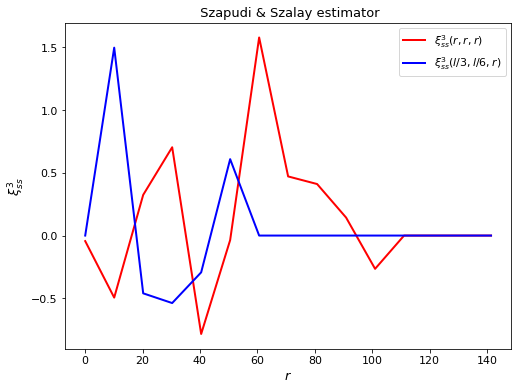

In [15]:
plt.figure(figsize = (8,6))
plt.title(r' Szapudi & Szalay estimator',fontsize=13)
plt.xlabel(r'$r$',fontsize=13)
plt.ylabel(r'${ \xi  }_{ ss }^{ 3 }$',fontsize=13)

plt.plot(r,xi_ss_1,color='red',ls='-',lw=2, label=r'${ \xi  }_{ ss }^{ 3 } (r,r,r)$')
plt.plot(r,xi_ss_2,color='blue',ls='-',lw=2, label=r'${ \xi  }_{ ss }^{ 3 } (l/3,l/6,r)$')

plt.legend(fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()